# imported library


In [1]:
import numpy as np
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
from numpy.linalg import inv
import skimage.io as io

# Load the data set


In [2]:
data=pd.read_csv("/home/sysadm/Downloads/Effect-Of-Climate-On-Energy-Consumption-main/Consumption_Climate_Average_West_Bengal_2018_2019_2020.csv")
data

Date  Consumption    avg_max    avg_min  avg_rain   avg_temp
0     2018-01-01         87.3  23.775773  11.385371       0.0  17.580572
1     2018-01-02         87.9  23.422979  11.027654       0.0  17.225316
2     2018-01-03         92.1  21.428075  10.351028       0.0  15.889552
3     2018-01-04         96.6  20.518272   9.465577       0.0  14.991924
4     2018-01-05         98.5  21.488783   8.556001       0.0  15.022392
...          ...          ...        ...        ...       ...        ...
1000  2020-12-27        110.0  23.572216  10.109815       0.0  16.841016
1001  2020-12-28        111.1  23.569913   9.930083       0.0  16.749998
1002  2020-12-29        116.1  23.504397  10.118490       0.0  16.811444
1003  2020-12-30        115.9  24.180420  10.423822       0.0  17.302121
1004  2020-12-31        116.9  24.183765  10.296123       0.0  17.239944

[1005 rows x 6 columns]

In [3]:
data_mod = data.drop(['avg_temp'],axis = 1)
data_mod

Date  Consumption    avg_max    avg_min  avg_rain
0     2018-01-01         87.3  23.775773  11.385371       0.0
1     2018-01-02         87.9  23.422979  11.027654       0.0
2     2018-01-03         92.1  21.428075  10.351028       0.0
3     2018-01-04         96.6  20.518272   9.465577       0.0
4     2018-01-05         98.5  21.488783   8.556001       0.0
...          ...          ...        ...        ...       ...
1000  2020-12-27        110.0  23.572216  10.109815       0.0
1001  2020-12-28        111.1  23.569913   9.930083       0.0
1002  2020-12-29        116.1  23.504397  10.118490       0.0
1003  2020-12-30        115.9  24.180420  10.423822       0.0
1004  2020-12-31        116.9  24.183765  10.296123       0.0

[1005 rows x 5 columns]

In [4]:
#find the missing value exist in dataset or not
data_mod.isnull().sum().sort_values(ascending = False)

Date           0
Consumption    0
avg_max        0
avg_min        0
avg_rain       0
dtype: int64

divided the whole data into three parts: Traindata -> 50% , Validationdata ->20% , Testdata ->30%

In [5]:
k = len(data_mod)
k

1005

In [6]:
l = k *(50/100)
l

502.5

In [7]:
l1 = k*(20/100)
l1

201.0

In [8]:
l2 = np.floor(l)+np.ceil(l1)
l2

703.0

In [9]:
train_data = data_mod.iloc[np.arange(0,np.floor(l),1),:]
train_data

Date  Consumption    avg_max    avg_min  avg_rain
0    2018-01-01         87.3  23.775773  11.385371  0.000000
1    2018-01-02         87.9  23.422979  11.027654  0.000000
2    2018-01-03         92.1  21.428075  10.351028  0.000000
3    2018-01-04         96.6  20.518272   9.465577  0.000000
4    2018-01-05         98.5  21.488783   8.556001  0.000000
..          ...          ...        ...        ...       ...
497  2019-06-17        187.7  35.463972  27.157058  3.951486
498  2019-06-18        176.5  35.955625  26.890523  2.854945
499  2019-06-19        192.0  36.943127  26.544884  1.837000
500  2019-06-20        184.5  34.885400  26.673153  3.131555
501  2019-06-21        175.3  33.028424  26.081765  7.633012

[502 rows x 5 columns]

In [10]:
valid_data = data_mod.iloc[np.arange(np.floor(l),np.floor(l2),1),:]
valid_data

Date  Consumption    avg_max    avg_min   avg_rain
502  2019-06-22        170.0  32.550844  25.614253  10.673783
503  2019-06-23        163.8  33.736199  26.158733   5.976364
504  2019-06-24        183.4  35.817524  26.566101   2.032558
505  2019-06-25        195.2  35.416690  27.084348   2.586521
506  2019-06-26        181.6  34.161932  26.451631  20.428912
..          ...          ...        ...        ...        ...
698  2020-01-11        110.0  20.946297  10.546587   0.000000
699  2020-01-12        103.3  22.103150   9.919093   0.000000
700  2020-01-13        110.9  22.240171   9.408987   0.000000
701  2020-01-14        113.8  23.454464   9.779413   0.000000
702  2020-01-15        111.2  24.259658  10.631236   0.000000

[201 rows x 5 columns]

replace index by date

In [11]:
train_data = data_mod.iloc[np.arange(0,np.floor(l),1),:]
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date',inplace = True)
train_data

/home/sysadm/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Consumption    avg_max    avg_min  avg_rain
Date                                                   
2018-01-01         87.3  23.775773  11.385371  0.000000
2018-01-02         87.9  23.422979  11.027654  0.000000
2018-01-03         92.1  21.428075  10.351028  0.000000
2018-01-04         96.6  20.518272   9.465577  0.000000
2018-01-05         98.5  21.488783   8.556001  0.000000
...                 ...        ...        ...       ...
2019-06-17        187.7  35.463972  27.157058  3.951486
2019-06-18        176.5  35.955625  26.890523  2.854945
2019-06-19        192.0  36.943127  26.544884  1.837000
2019-06-20        184.5  34.885400  26.673153  3.131555
2019-06-21        175.3  33.028424  26.081765  7.633012

[502 rows x 4 columns]

In [12]:
valid_data = data_mod.iloc[np.arange(np.floor(l),np.floor(l2),1),:]
valid_data['Date'] = pd.to_datetime(valid_data['Date'])
valid_data.set_index('Date',inplace = True)
valid_data

/home/sysadm/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Consumption    avg_max    avg_min   avg_rain
Date                                                    
2019-06-22        170.0  32.550844  25.614253  10.673783
2019-06-23        163.8  33.736199  26.158733   5.976364
2019-06-24        183.4  35.817524  26.566101   2.032558
2019-06-25        195.2  35.416690  27.084348   2.586521
2019-06-26        181.6  34.161932  26.451631  20.428912
...                 ...        ...        ...        ...
2020-01-11        110.0  20.946297  10.546587   0.000000
2020-01-12        103.3  22.103150   9.919093   0.000000
2020-01-13        110.9  22.240171   9.408987   0.000000
2020-01-14        113.8  23.454464   9.779413   0.000000
2020-01-15        111.2  24.259658  10.631236   0.000000

[201 rows x 4 columns]

In [13]:
test_data = data_mod.iloc[np.arange(np.floor(l2),np.floor(k),1),:]
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data.set_index('Date',inplace = True)
test_data

/home/sysadm/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Consumption    avg_max    avg_min  avg_rain
Date                                                   
2020-01-16        113.8  25.247615  11.614844  0.000000
2020-01-17        115.0  25.523830  12.652791  0.000000
2020-01-18        116.0  25.982946  13.263768  0.090870
2020-01-19        107.4  22.704476  13.239774  0.058254
2020-01-20        112.2  21.294472  12.021376  0.085272
...                 ...        ...        ...       ...
2020-12-27        110.0  23.572216  10.109815  0.000000
2020-12-28        111.1  23.569913   9.930083  0.000000
2020-12-29        116.1  23.504397  10.118490  0.000000
2020-12-30        115.9  24.180420  10.423822  0.000000
2020-12-31        116.9  24.183765  10.296123  0.000000

[302 rows x 4 columns]

In [14]:
train_data_1 = train_data.drop(['Consumption'],axis = 1)
train_data_1

avg_max    avg_min  avg_rain
Date                                      
2018-01-01  23.775773  11.385371  0.000000
2018-01-02  23.422979  11.027654  0.000000
2018-01-03  21.428075  10.351028  0.000000
2018-01-04  20.518272   9.465577  0.000000
2018-01-05  21.488783   8.556001  0.000000
...               ...        ...       ...
2019-06-17  35.463972  27.157058  3.951486
2019-06-18  35.955625  26.890523  2.854945
2019-06-19  36.943127  26.544884  1.837000
2019-06-20  34.885400  26.673153  3.131555
2019-06-21  33.028424  26.081765  7.633012

[502 rows x 3 columns]

In [15]:
valid_data_1 = valid_data.drop(['Consumption'],axis = 1)
valid_data_1

avg_max    avg_min   avg_rain
Date                                       
2019-06-22  32.550844  25.614253  10.673783
2019-06-23  33.736199  26.158733   5.976364
2019-06-24  35.817524  26.566101   2.032558
2019-06-25  35.416690  27.084348   2.586521
2019-06-26  34.161932  26.451631  20.428912
...               ...        ...        ...
2020-01-11  20.946297  10.546587   0.000000
2020-01-12  22.103150   9.919093   0.000000
2020-01-13  22.240171   9.408987   0.000000
2020-01-14  23.454464   9.779413   0.000000
2020-01-15  24.259658  10.631236   0.000000

[201 rows x 3 columns]

In [16]:
test_data_1 = test_data.drop(['Consumption'],axis = 1)
test_data_1

avg_max    avg_min  avg_rain
Date                                      
2020-01-16  25.247615  11.614844  0.000000
2020-01-17  25.523830  12.652791  0.000000
2020-01-18  25.982946  13.263768  0.090870
2020-01-19  22.704476  13.239774  0.058254
2020-01-20  21.294472  12.021376  0.085272
...               ...        ...       ...
2020-12-27  23.572216  10.109815  0.000000
2020-12-28  23.569913   9.930083  0.000000
2020-12-29  23.504397  10.118490  0.000000
2020-12-30  24.180420  10.423822  0.000000
2020-12-31  24.183765  10.296123  0.000000

[302 rows x 3 columns]

# Linear least square method


In [17]:
deg = np.arange(1,10,1)
deg

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
len(deg)

9

general formula for desire degree polynomial

In [19]:
self = valid_data

f =5
g =1 

deg = np.arange(1,f,g)

R_square_list = []

for k in range(len(deg)):
    degree = deg[k]
    
    def matrix_all(self,degree):
        self_1 = self.drop(['Consumption'],axis = 1)
        s = self_1.T.to_numpy()
        r = s
        for i in range(1,degree):
            x = s
            r = np.vstack((r,x**(i+1)))
        return r

    def matrix_construction(self):
        return np.vstack((matrix_all(self,degree), np.ones(len(self))))


    def lss_est_coff(train_data):
        y = train_data['Consumption']
        w = np.matmul(np.linalg.inv(np.matmul(matrix_construction(train_data),matrix_construction(train_data).T)),(np.matmul(matrix_construction(train_data),y)))
        return w

    def pred_consumption_1(self):
        w = lss_est_coff(train_data)
        consumption_forcast = np.matmul(matrix_construction(self).T,w)
        return consumption_forcast

    #mean square error for using linear least square regression
    def mse_1(self):
        y_pred = pred_consumption_1(self)
        y_actual = np.array(self['Consumption'])
        square_error = np.sum((np.subtract(y_actual,y_pred))**2)
        mean_square_error = square_error/len(self['Consumption'])
        return mean_square_error


    #TSS for using linear least square regression
    def tss_1(self):
        y_actual = np.array(self['Consumption'])
        y_mean = y_actual.mean()
        total_square_error = np.sum((np.subtract(y_actual,y_mean))**2)/len(self['Consumption'])
        return total_square_error

    def r_square_1(self):
        return 1-(mse_1(self)/tss_1(self))

    # root mean square error for using linear least square regression
    def rmse_1(self):
        return (mse_1(self))**(1/2)

    print("The value of R^2 over validation data for degree = {} is {}".format(degree,1-(mse_1(self)/tss_1(self))))
    
    R_square_list.append(1-(mse_1(self)/tss_1(self)))
print(R_square_list) 

The value of R^2 over validation data for degree = 1 is 0.7361841253981656
The value of R^2 over validation data for degree = 2 is 0.8584014126024448
The value of R^2 over validation data for degree = 3 is 0.8567450366901779
The value of R^2 over validation data for degree = 4 is 0.8496339838538429
[0.7361841253981656, 0.8584014126024448, 0.8567450366901779, 0.8496339838538429]


In [20]:
degree = deg.tolist()
degree

[1, 2, 3, 4]

In [21]:
df1 = pd.DataFrame(zip(degree,R_square_list),columns = ['degree','R^2'])
df1

degree       R^2
0       1  0.736184
1       2  0.858401
2       3  0.856745
3       4  0.849634

<AxesSubplot:xlabel='degree'>

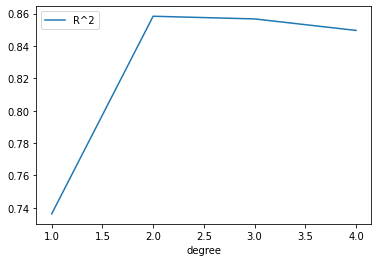

In [22]:
df1.plot(x = 'degree',y = 'R^2')

In [23]:
print(df1['R^2'].max())

0.8584014126024448


In [24]:
index = df1['R^2'].idxmax()
best_degree = df1['degree'][index]
best_degree

2

In [25]:
best_degree

2

prediction over test_data for best degree polynomial

In [26]:
degree = best_degree
self = test_data

def matrix_all(self,degree):
    self_1 = self.drop(['Consumption'],axis = 1)
    s = self_1.T.to_numpy()
    r = s
    for i in range(1,degree):
        x = s
        r = np.vstack((r,x**(i+1)))
    return r

def matrix_construction(self):
    return np.vstack((matrix_all(self,degree), np.ones(len(self))))

In [27]:
matrix_construction(test_data)


array([[2.52476154e+01, 2.55238300e+01, 2.59829455e+01, ...,
        2.35043970e+01, 2.41804202e+01, 2.41837645e+01],
       [1.16148445e+01, 1.26527910e+01, 1.32637682e+01, ...,
        1.01184900e+01, 1.04238217e+01, 1.02961225e+01],
       [0.00000000e+00, 0.00000000e+00, 9.08695985e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.34904612e+02, 1.60093121e+02, 1.75927547e+02, ...,
        1.02383840e+02, 1.08656058e+02, 1.06010139e+02],
       [0.00000000e+00, 0.00000000e+00, 8.25728394e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

the value of R^2 over test data for best fitting curve

In [28]:
degree = best_degree
self = test_data

def matrix_all(self,degree):
    self_1 = self.drop(['Consumption'],axis = 1)
    s = self_1.T.to_numpy()
    r = s
    for i in range(1,degree):
        x = s
        r = np.vstack((r,x**(i+1)))
    return r

def matrix_construction(self):
    return np.vstack((matrix_all(self,degree), np.ones(len(self))))

def lss_est_coff(train_data):
    y = train_data['Consumption']
    w = np.matmul(np.linalg.inv(np.matmul(matrix_construction(train_data),matrix_construction(train_data).T)),(np.matmul(matrix_construction(train_data),y)))
    return w


def pred_consumption_1(self):
    w = lss_est_coff(train_data)
    consumption_forcast = np.matmul(matrix_construction(self).T,w)
    return consumption_forcast

def plot_1(self):
    plt.plot(self.index,np.array(self['Consumption']), color = "g",label = "true consumption")
    plt.subplots_adjust(top = 1.8,right = 1.8)
    plt.plot(self.index,pred_consumption_1(self), color = "b",label = "predictrd consumption ")
    plt.subplots_adjust(top = 1.8,right = 1.8)
    plt.legend()
    plt.show()

#mean square error for using linear least square regression
def mse_1(self):
    y_pred = pred_consumption_1(self)
    y_actual = np.array(self['Consumption'])
    square_error = np.sum((np.subtract(y_actual,y_pred))**2)
    mean_square_error = square_error/len(self['Consumption'])
    return mean_square_error


#TSS for using linear least square regression
def tss_1(self):
    y_actual = np.array(self['Consumption'])
    y_mean = y_actual.mean()
    total_square_error = np.sum((np.subtract(y_actual,y_mean))**2)/len(self['Consumption'])
    return total_square_error

def r_square_1(self):
    return 1-(mse_1(self)/tss_1(self))

# root mean square error for using linear least square regression
def rmse_1(self):
    return (mse_1(self))**(1/2)

print("The value of root mean square error  for degree = {} for test data is {}".format(degree,rmse_1(self)))

print("The value of R^2 for degree = {} for test data is {}".format(degree,1-(mse_1(self)/tss_1(self))))


The value of root mean square error  for degree = 2 for test data is 19.355960723056462
The value of R^2 for degree = 2 for test data is 0.3883013687215382


Root mean square error for using linear least square regression for best degree polynomial curve

In [29]:
# root mean square error for using linear least square regression
def rmse_1(self):
    return (mse_1(self))**(1/2)

In [30]:
rmse_1(train_data)
print("The value of root mean square error for train data is {}".format(rmse_1(train_data)))

The value of root mean square error for train data is 9.08243749684987


In [31]:
rmse_1(valid_data)
print("The value of root mean square error for validation data is {}".format(rmse_1(valid_data)))

The value of root mean square error for validation data is 10.784551362037735


In [32]:
rmse_1(test_data)
print("The value of root mean square error for test data is {}".format(rmse_1(test_data)))

The value of root mean square error for test data is 19.355960723056462


coefficient of determination(R^2) of linear least square regression

In [33]:
def r_square_1(self):
    return 1-(mse_1(self)/tss_1(self))

In [34]:
r_square_1(train_data)
print("The value of R^2 for degree = {} for train data is {}".format(best_degree,r_square_1(train_data)))

The value of R^2 for degree = 2 for train data is 0.871387575896419


In [35]:
r_square_1(valid_data)
print("The value of R^2 for degree = {} for validation data is {}".format(best_degree,r_square_1(valid_data)))

The value of R^2 for degree = 2 for validation data is 0.8584014126024448


In [36]:
r_square_1(test_data)
print("The value of R^2 for degree = {} for test data is {}".format(best_degree,r_square_1(test_data)))

The value of R^2 for degree = 2 for test data is 0.3883013687215382


# plotting of true data and predicted data under linear least square method of best degree polynomial

In [37]:
degree = best_degree

def matrix_all(self,degree):
    self_1 = self.drop(['Consumption'],axis = 1)
    s = self_1.T.to_numpy()
    r = s
    for i in range(1,degree):
        x = s
        r = np.vstack((r,x**(i+1)))
    return r

def matrix_construction(self):
    return np.vstack((matrix_all(self,degree), np.ones(len(self))))

def lss_est_coff(train_data):
    y = train_data['Consumption']
    w = np.matmul(np.linalg.inv(np.matmul(matrix_construction(train_data),matrix_construction(train_data).T)),(np.matmul(matrix_construction(train_data),y)))
    return w


def pred_consumption_1(self):
    w = lss_est_coff(train_data)
    consumption_forcast = np.matmul(matrix_construction(self).T,w)
    return consumption_forcast

def plot_1(self):
    plt.plot(self.index,np.array(self['Consumption']), color = "m",label = "true consumption")
    plt.subplots_adjust(top = 1.8,right = 1.8)
    plt.plot(self.index,pred_consumption_1(self), color = "b",label = "predictrd consumption ")
    plt.subplots_adjust(top = 1.8,right = 1.8)
    plt.legend()
    plt.show()

plot the train_consumption

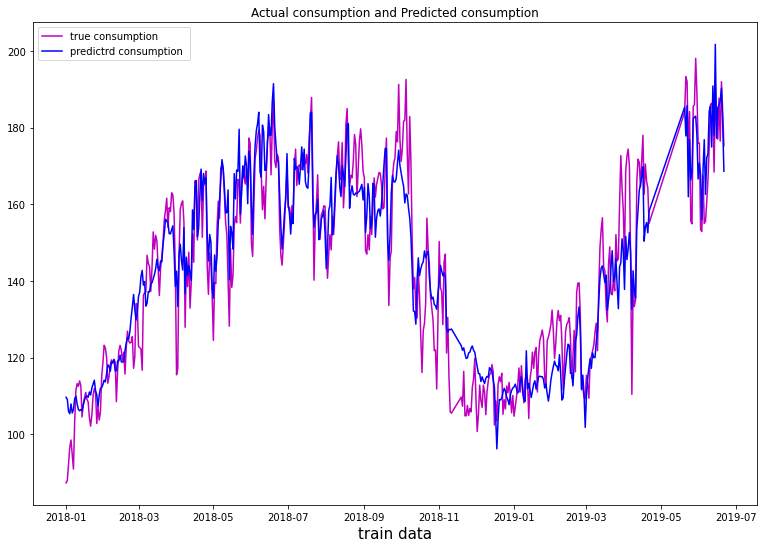

In [38]:
plt.title('Actual consumption and Predicted consumption')
plt.xlabel('train data',fontsize = 15)
plot_1(train_data)

plot the valid_consumption

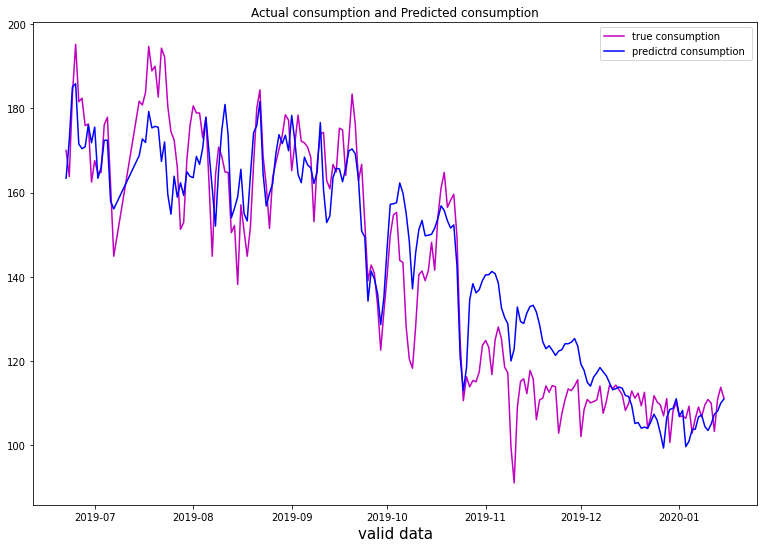

In [39]:
plt.title('Actual consumption and Predicted consumption')
plt.xlabel('valid data',fontsize = 15)
plot_1(valid_data)

plot the test_consumption

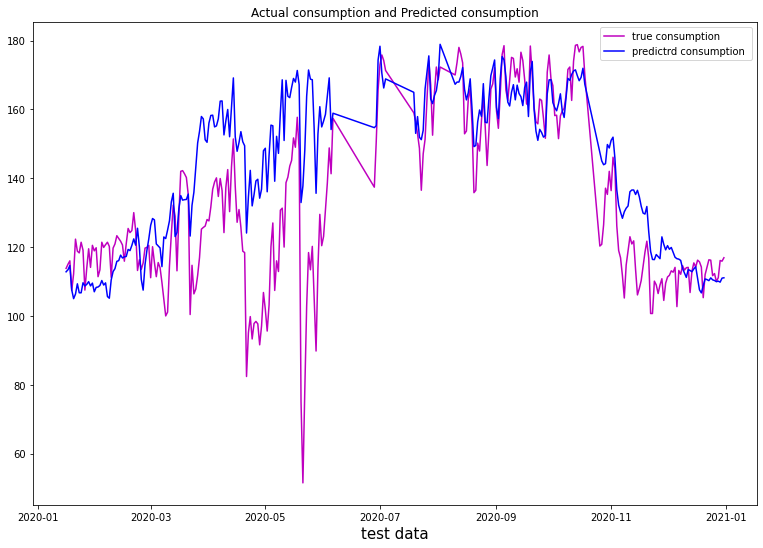

In [40]:
plt.title('Actual consumption and Predicted consumption')
plt.xlabel('test data',fontsize = 15)
plot_1(test_data)

# Ridge regression model

In [41]:
arr1 = np.linspace(0,10,1000)
print(arr1)

[ 0.          0.01001001  0.02002002  0.03003003  0.04004004  0.05005005
  0.06006006  0.07007007  0.08008008  0.09009009  0.1001001   0.11011011
  0.12012012  0.13013013  0.14014014  0.15015015  0.16016016  0.17017017
  0.18018018  0.19019019  0.2002002   0.21021021  0.22022022  0.23023023
  0.24024024  0.25025025  0.26026026  0.27027027  0.28028028  0.29029029
  0.3003003   0.31031031  0.32032032  0.33033033  0.34034034  0.35035035
  0.36036036  0.37037037  0.38038038  0.39039039  0.4004004   0.41041041
  0.42042042  0.43043043  0.44044044  0.45045045  0.46046046  0.47047047
  0.48048048  0.49049049  0.5005005   0.51051051  0.52052052  0.53053053
  0.54054054  0.55055055  0.56056056  0.57057057  0.58058058  0.59059059
  0.6006006   0.61061061  0.62062062  0.63063063  0.64064064  0.65065065
  0.66066066  0.67067067  0.68068068  0.69069069  0.7007007   0.71071071
  0.72072072  0.73073073  0.74074074  0.75075075  0.76076076  0.77077077
  0.78078078  0.79079079  0.8008008   0.81081081  0

find the best lamda value based upon highest R^2 value for a any degree polynomial on validation data

The value of R^2 of 1-degree ridge regression for lamda = 0.0 is 0.7361841253981656
The value of R^2 of 1-degree ridge regression for lamda = 0.10101010101010101 is 0.7368351822738521
The value of R^2 of 1-degree ridge regression for lamda = 0.20202020202020202 is 0.7374238999173236
The value of R^2 of 1-degree ridge regression for lamda = 0.30303030303030304 is 0.7379574726431528
The value of R^2 of 1-degree ridge regression for lamda = 0.40404040404040403 is 0.7384421105285905
The value of R^2 of 1-degree ridge regression for lamda = 0.5050505050505051 is 0.7388831948996288
The value of R^2 of 1-degree ridge regression for lamda = 0.6060606060606061 is 0.7392854060686556
The value of R^2 of 1-degree ridge regression for lamda = 0.7070707070707071 is 0.7396528288233879
The value of R^2 of 1-degree ridge regression for lamda = 0.8080808080808081 is 0.739989039969692
The value of R^2 of 1-degree ridge regression for lamda = 0.9090909090909091 is 0.7402971813220144
The value of R^2 of 1-

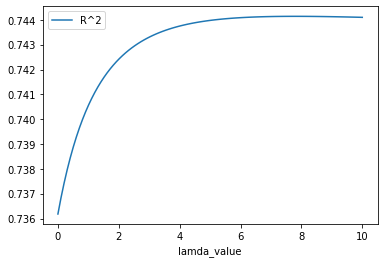

The value of R^2 of 2-degree ridge regression for lamda = 0.0 is 0.8584014126024448
The value of R^2 of 2-degree ridge regression for lamda = 0.10101010101010101 is 0.8485990302130234
The value of R^2 of 2-degree ridge regression for lamda = 0.20202020202020202 is 0.8425346625759194
The value of R^2 of 2-degree ridge regression for lamda = 0.30303030303030304 is 0.8386566191367439
The value of R^2 of 2-degree ridge regression for lamda = 0.40404040404040403 is 0.8359900802949589
The value of R^2 of 2-degree ridge regression for lamda = 0.5050505050505051 is 0.8340480928083108
The value of R^2 of 2-degree ridge regression for lamda = 0.6060606060606061 is 0.832570382349199
The value of R^2 of 2-degree ridge regression for lamda = 0.7070707070707071 is 0.8314070009577756
The value of R^2 of 2-degree ridge regression for lamda = 0.8080808080808081 is 0.8304659385106798
The value of R^2 of 2-degree ridge regression for lamda = 0.9090909090909091 is 0.8296877564914797
The value of R^2 of 2-

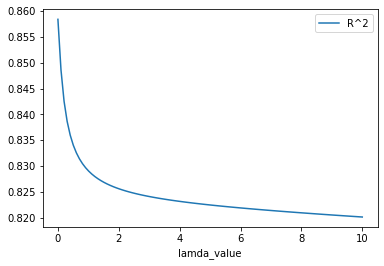

The value of R^2 of 3-degree ridge regression for lamda = 0.0 is 0.8567450366901779
The value of R^2 of 3-degree ridge regression for lamda = 0.10101010101010101 is 0.8484548943339112
The value of R^2 of 3-degree ridge regression for lamda = 0.20202020202020202 is 0.8483224822091305
The value of R^2 of 3-degree ridge regression for lamda = 0.30303030303030304 is 0.8483520915285234
The value of R^2 of 3-degree ridge regression for lamda = 0.40404040404040403 is 0.8484208547451726
The value of R^2 of 3-degree ridge regression for lamda = 0.5050505050505051 is 0.8485031687261817
The value of R^2 of 3-degree ridge regression for lamda = 0.6060606060606061 is 0.8485904559532655
The value of R^2 of 3-degree ridge regression for lamda = 0.7070707070707071 is 0.8486791008470367
The value of R^2 of 3-degree ridge regression for lamda = 0.8080808080808081 is 0.8487673653711797
The value of R^2 of 3-degree ridge regression for lamda = 0.9090909090909091 is 0.8488543472810728
The value of R^2 of 3

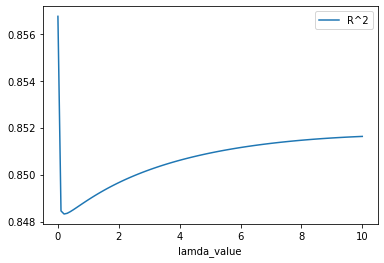

The value of R^2 of 4-degree ridge regression for lamda = 0.0 is 0.8496339838538429
The value of R^2 of 4-degree ridge regression for lamda = 0.10101010101010101 is 0.8424994382774483
The value of R^2 of 4-degree ridge regression for lamda = 0.20202020202020202 is 0.840364016214603
The value of R^2 of 4-degree ridge regression for lamda = 0.30303030303030304 is 0.8385147432185993
The value of R^2 of 4-degree ridge regression for lamda = 0.40404040404040403 is 0.8368639441671976
The value of R^2 of 4-degree ridge regression for lamda = 0.5050505050505051 is 0.8353602253215372
The value of R^2 of 4-degree ridge regression for lamda = 0.6060606060606061 is 0.833970960363805
The value of R^2 of 4-degree ridge regression for lamda = 0.7070707070707071 is 0.8326742672427765
The value of R^2 of 4-degree ridge regression for lamda = 0.8080808080808081 is 0.8314547995653757
The value of R^2 of 4-degree ridge regression for lamda = 0.9090909090909091 is 0.8303013813457502
The value of R^2 of 4-d

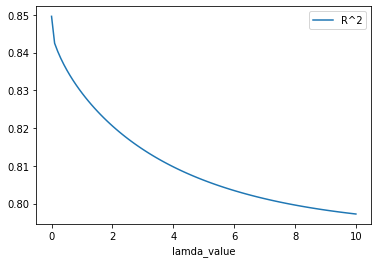

[(1, 7.777777777777778, 0.7441418598880523), (2, 0.0, 0.8584014126024448), (3, 0.0, 0.8567450366901779), (4, 0.0, 0.8496339838538429)]


In [42]:
self = valid_data

a = 5
b =1 



best_lamda_best_R_sq = []

deg = np.arange(1,a,b)


for k in range(len(deg)):



    degree = deg[k]

    E = np.matmul(matrix_construction(train_data),matrix_construction(train_data).T)
    I = np.eye( E.shape[0])

    f = 10
    g = 100

    arr1 = np.linspace(0,f,g)

    R_square_list = []

    for i in range(len(arr1)):

        def matrix_all(self,degree):
            self_1 = self.drop(['Consumption'],axis = 1)
            s = self_1.T.to_numpy()
            r = s
            for i in range(1,degree):
                x = s
                r = np.vstack((r,x**(i+1)))
            return r

        def matrix_construction(self):
            return np.vstack((matrix_all(self,degree), np.ones(len(self))))


        def rdg_est_coff(train_data):
            y = train_data['Consumption']
            A = np.matmul(matrix_construction(train_data),matrix_construction(train_data).T)
            I_ = I*arr1[i]
            w = np.matmul(np.linalg.inv(np.add(A,I_)),(np.matmul(matrix_construction(train_data),y)))
            return w

        def pred_consumption_2(self):
            w = rdg_est_coff(train_data)
            consumption_forcast = np.matmul(matrix_construction(self).T,w)
            return consumption_forcast

    #mean square error
        def mse_2(self):
            y_pred = pred_consumption_2(self)
            y_actual = np.array(self['Consumption'])
            square_error = np.sum((np.subtract(y_actual,y_pred))**2)
            mean_square_error = square_error/len(self['Consumption'])
            return mean_square_error

    #Total square error
        def tss_2(self):
            y_actual = np.array(self['Consumption'])
            y_mean = y_actual.mean()
            total_square_error = np.sum((np.subtract(y_actual,y_mean))**2)/len(self['Consumption'])
            return total_square_error

        def r_square_2(self):
            return 1-(mse_2(self)/tss_2(self))

        # root mean square error for using linear least square regression
        def rmse_2(self):
            return (mse_2(self))**(1/2)

        print("The value of R^2 of {}-degree ridge regression for lamda = {} is {}".format(degree,arr1[i],1-(mse_2(self)/tss_2(self))))

        R_square_list.append(1-(mse_2(self)/tss_2(self)))

    print(R_square_list)



    lamda_value = arr1.tolist()
    df2 = pd.DataFrame(zip(lamda_value,R_square_list),columns = ['lamda_value','R^2'])
    df2.plot(x = 'lamda_value',y = 'R^2')
    plt.show()
    best_R_sq = df2['R^2'].max()
    index = df2['R^2'].idxmax()
    best_lamda_value = df2['lamda_value'][index]

    best_lamda_best_R_sq .append((degree,best_lamda_value,best_R_sq))
    
print(best_lamda_best_R_sq)


best_lamda for any degree polynomial

In [43]:
best_lamda_best_R_sq

[(1, 7.777777777777778, 0.7441418598880523),
 (2, 0.0, 0.8584014126024448),
 (3, 0.0, 0.8567450366901779),
 (4, 0.0, 0.8496339838538429)]

In [44]:
s = list(zip(*best_lamda_best_R_sq))
s

[(1, 2, 3, 4),
 (7.777777777777778, 0.0, 0.0, 0.0),
 (0.7441418598880523,
  0.8584014126024448,
  0.8567450366901779,
  0.8496339838538429)]

In [45]:
deg_pol = list(s[0])
best_lamda = list(s[1])
R_sqr = list(s[2])


best lamda and best R square for different degree polynomial on based upon the value of R square on validation set

In [46]:

df5 = pd.DataFrame(zip(deg_pol,best_lamda,R_sqr),columns = ['deg_pol','best_lamda','R^2'])
df5

deg_pol  best_lamda       R^2
0        1    7.777778  0.744142
1        2    0.000000  0.858401
2        3    0.000000  0.856745
3        4    0.000000  0.849634

In [47]:
#df5.iloc[0]['deg_pol']

In [48]:
print(df5['R^2'].max())

0.8584014126024448


In [49]:
index = df5['R^2'].idxmax()
index

1

best degree polynomial and best lamda value based upon validation set

In [50]:
best_lamda_value = df5['best_lamda'][index]

best_lamda_value 

0.0

In [51]:
#lamda_value = df5.iloc[0]['best_lamda']

#lamda_value 

In [52]:
best_deg_pol = df5['deg_pol'][index]
best_deg_pol

2

In [53]:
#deg_pol = df5.iloc[0]['deg_pol']
#deg_pol

In [54]:
best_lamda 

[7.777777777777778, 0.0, 0.0, 0.0]

work on test data

In [55]:
self = test_data

deg = deg_pol 


for k in range(len(deg)):

    degree = deg[k]

    E = np.matmul(matrix_construction(train_data),matrix_construction(train_data).T)
    I = np.eye( E.shape[0])
    
    lamda = best_lamda 


    def matrix_all(self,degree):
        self_1 = self.drop(['Consumption'],axis = 1)
        s = self_1.T.to_numpy()
        r = s
        for i in range(1,degree):
            x = s
            r = np.vstack((r,x**(i+1)))
        return r

    def matrix_construction(self):
        return np.vstack((matrix_all(self,degree), np.ones(len(self))))


    def rdg_est_coff(train_data):
        y = train_data['Consumption']
        A = np.matmul(matrix_construction(train_data),matrix_construction(train_data).T)
        I_ = I*lamda [k]
        w = np.matmul(np.linalg.inv(np.add(A,I_)),(np.matmul(matrix_construction(train_data),y)))
        return w

    def pred_consumption_2(self):
        w = rdg_est_coff(train_data)
        consumption_forcast = np.matmul(matrix_construction(self).T,w)
        return consumption_forcast

#mean square error
    def mse_2_bs(self):
        y_pred = pred_consumption_2(self)
        y_actual = np.array(self['Consumption'])
        square_error = np.sum((np.subtract(y_actual,y_pred))**2)
        mean_square_error = square_error/len(self['Consumption'])
        return mean_square_error

#Total square error
    def tss_2_bs(self):
        y_actual = np.array(self['Consumption'])
        y_mean = y_actual.mean()
        total_square_error = np.sum((np.subtract(y_actual,y_mean))**2)/len(self['Consumption'])
        return total_square_error

    def r_square_2_bs(self):
        return 1-(mse_2_bs(self)/tss_2_bs(self))

    # root mean square error for using linear least square regression
    def rmse_2(self):
        return (mse_2_bs(self))**(1/2)
    
    def plot_2(self):
        plt.plot(self.index,np.array(self['Consumption']), color = "g",label = "true consumption")
        plt.subplots_adjust(top = 1.8,right = 1.8)
        plt.plot(self.index,pred_consumption_2_ex(self), color = "m",label = "consumption forcast ")
        plt.subplots_adjust(top = 1.8,right = 1.8)
        plt.legend()
        plt.show()   
    print("The value of R^2 of {}-degree ridge regression for test data for lamda = {} is {}".format(degree,lamda[k],1-(mse_2_bs(self)/tss_2_bs(self))))





The value of R^2 of 1-degree ridge regression for test data for lamda = 7.777777777777778 is 0.21614127887885215
The value of R^2 of 2-degree ridge regression for test data for lamda = 0.0 is 0.3883013687215382
The value of R^2 of 3-degree ridge regression for test data for lamda = 0.0 is 0.42031291198043497
The value of R^2 of 4-degree ridge regression for test data for lamda = 0.0 is -3.6079987949922643


plotting of true data and predicted data under ridge regression method for getting best R^2 based upon validation set


In [56]:
degree = best_degree
lamda = best_lamda_value 

def matrix_all(self,degree):
    self_1 = self.drop(['Consumption'],axis = 1)
    s = self_1.T.to_numpy()
    r = s
    for i in range(1,degree):
        x = s
        r = np.vstack((r,x**(i+1)))
    return r

def matrix_construction(self):
    return np.vstack((matrix_all(self,degree), np.ones(len(self))))


def rdg_est_coff(train_data):
    y = train_data['Consumption']
    A = np.matmul(matrix_construction(train_data),matrix_construction(train_data).T)
    I = np.eye( A.shape[0])
    I_ = I*lamda
    w = np.matmul(np.linalg.inv(np.add(A,I_)),(np.matmul(matrix_construction(train_data),y)))
    return w

def pred_consumption_2_ex(self):
    w = rdg_est_coff(train_data)
    consumption_forcast = np.matmul(matrix_construction(self).T,w)
    return consumption_forcast

def plot_2(self):
    plt.plot(self.index,np.array(self['Consumption']), color = "m",label = "true consumption")
    plt.subplots_adjust(top = 1.8,right = 1.8)
    plt.plot(self.index,pred_consumption_2_ex(self), color = "b",label = "predictrd consumption ")
    plt.subplots_adjust(top = 1.8,right = 1.8)
    plt.legend()
    plt.show()

plot the train_consumption


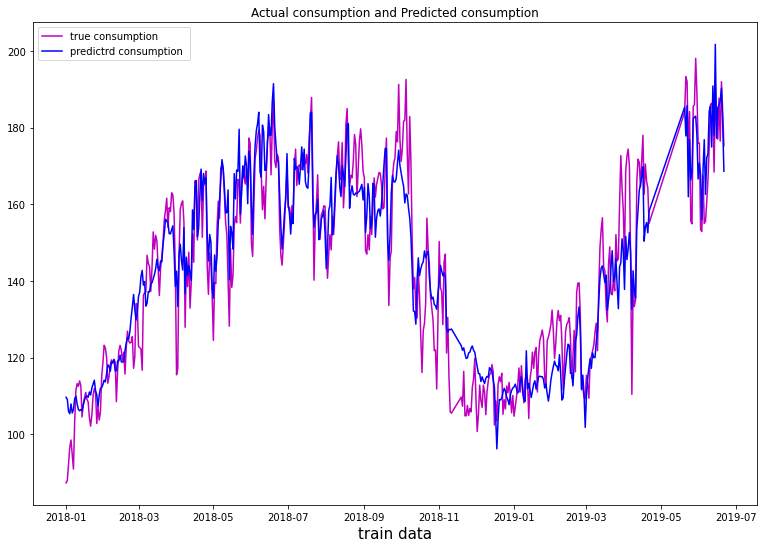

In [57]:
plt.title('Actual consumption and Predicted consumption')
plt.xlabel('train data',fontsize = 15)
plot_2(train_data)

plot the valid consumption


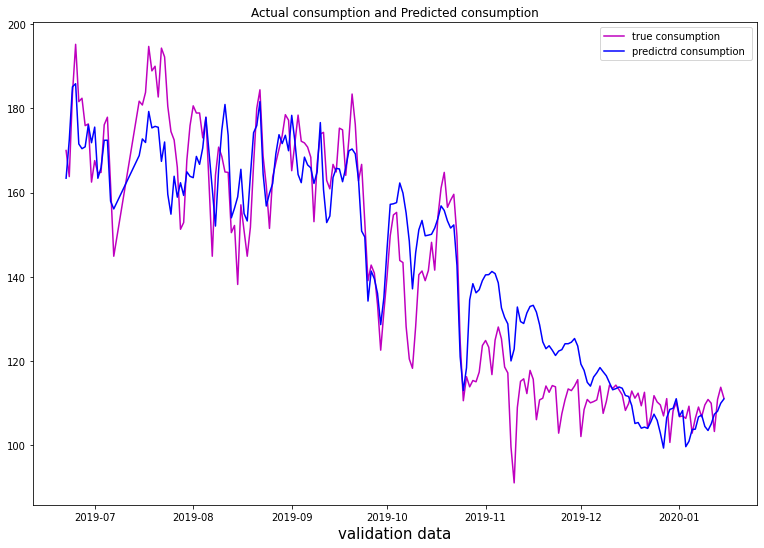

In [58]:
plt.title('Actual consumption and Predicted consumption')
plt.xlabel('validation data',fontsize = 15)
plot_2(valid_data)

plot the test_consumption


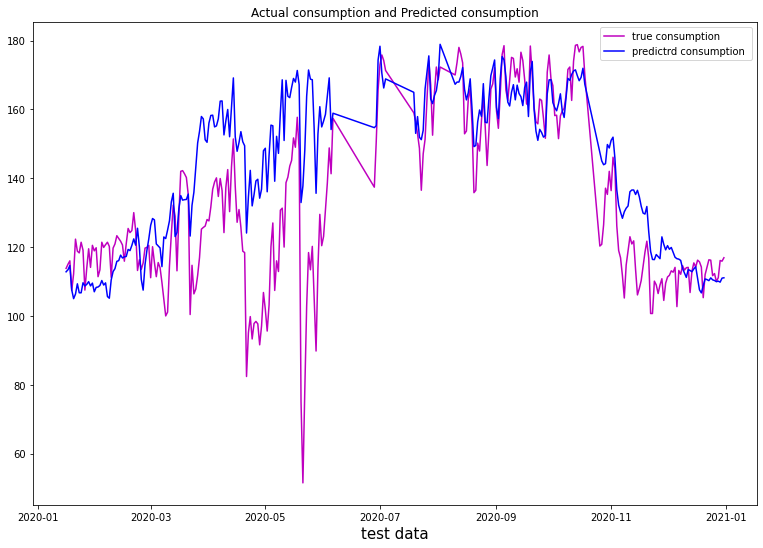

In [59]:
plt.title('Actual consumption and Predicted consumption')
plt.xlabel('test data',fontsize = 15)
plot_2(test_data)

Root mean square error for using ridge regression for best degree polynomial curve



In [60]:
degree = best_degree
lamda = best_lamda_value 

def matrix_all(self,degree):
    self_1 = self.drop(['Consumption'],axis = 1)
    s = self_1.T.to_numpy()
    r = s
    for i in range(1,degree):
        x = s
        r = np.vstack((r,x**(i+1)))
    return r

def matrix_construction(self):
    return np.vstack((matrix_all(self,degree), np.ones(len(self))))


def rdg_est_coff(train_data):
    y = train_data['Consumption']
    A = np.matmul(matrix_construction(train_data),matrix_construction(train_data).T)
    I = np.eye( A.shape[0])
    I_ = I*lamda
    w = np.matmul(np.linalg.inv(np.add(A,I_)),(np.matmul(matrix_construction(train_data),y)))
    return w

def pred_consumption_2_ex(self):
    w = rdg_est_coff(train_data)
    consumption_forcast = np.matmul(matrix_construction(self).T,w)
    return consumption_forcast

In [61]:
#mean square error
def mse_2(self):
    y_pred = pred_consumption_2_ex(self)
    y_actual = np.array(self['Consumption'])
    square_error = np.sum((np.subtract(y_actual,y_pred))**2)
    mean_square_error = square_error/len(self['Consumption'])
    return mean_square_error

In [62]:
#Total square error
def tss_2(self):
    y_actual = np.array(self['Consumption'])
    y_mean = y_actual.mean()
    total_square_error = np.sum((np.subtract(y_actual,y_mean))**2)/len(self['Consumption'])
    return total_square_error

In [63]:
# root mean square error for using ridge regression
def rmse_2(self):
    return (mse_2(self))**(1/2)

In [64]:
rmse_2(test_data)
print("The value of root mean square error for test data is {}".format(rmse_2(test_data)))

The value of root mean square error for test data is 19.355960723056462


In [65]:
def r_square_2(self):
    return 1-(mse_2(self)/tss_2(self))

In [66]:
r_square_2(test_data)
print("The value of R^2 for test data is {}".format(r_square_2(test_data)))

The value of R^2 for test data is 0.3883013687215382


# Lasso Regression


In [67]:
self = train_data
degree = 1
def matrix_all(self,degree):
    self_1 = self.drop(['Consumption'],axis = 1)
    s = self_1.T.to_numpy()
    r = s
    for i in range(1,degree):
        x = s
        r = np.vstack((r,x**(i+1)))
    return r
def matrix_construction(self):
    return np.vstack((np.ones(len(self)),(matrix_all(self,degree))))

In [68]:
x2 = matrix_construction(train_data)

In [69]:
iters = 10000
lr = 0.0005
alpha = 0.01
w = np.zeros((4,1))

In [70]:
y2 = np.array(train_data['Consumption'])

In [71]:
for i in range(iters):
    y_pred2 = np.dot(w.T,x2)
    e  = y2 - y_pred2
    for j in range(x2.shape[0]):
        if w[j] > 0 :
            w[j] -= lr*(alpha + np.dot(x2[j,:].reshape(len(y2.T),1).T,e.T)).reshape(1,)/x2.shape[1]
        else :
            w[j] -= lr*(alpha  - np.dot(x2[j,:].reshape(len(y2.T),1).T,e.T)).reshape(1,)/x2.shape[1]

In [72]:
print(w,x2.shape)

[[-0.06384004]
 [ 2.06860501]
 [ 1.41548833]
 [-0.28932851]] (4, 502)


In [73]:
y2 = np.array(train_data['Consumption']).reshape(502,1)

In [74]:
y_pred2 = np.dot(w.T,x2).T
print(y_pred2.shape)
rmse = np.power((np.sum((y2 - y_pred2)**2)/502),0.5)
print(rmse)
rsq = 1- np.sum((y2 - y_pred2)**2)/np.sum((y2 - np.mean(y2))**2)
print(rsq) 

(502, 1)
55.50134225489409
-3.802695593732997


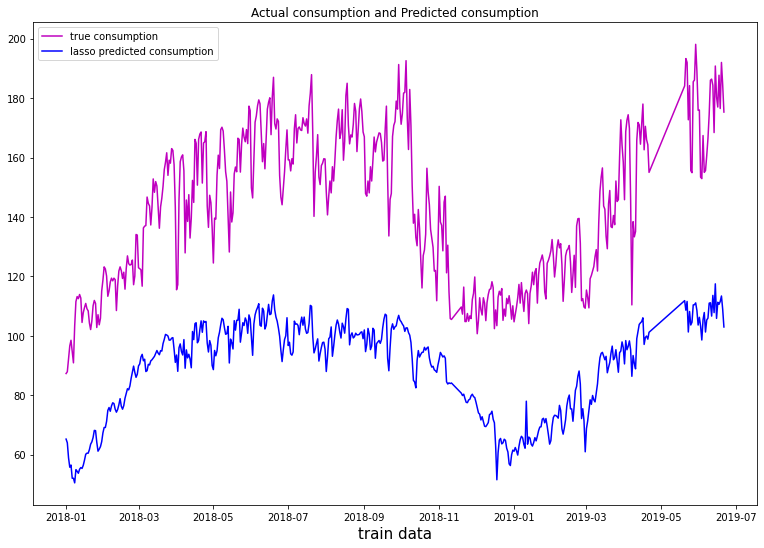

In [75]:
plt.title('Actual consumption and Predicted consumption')
plt.xlabel('train data',fontsize = 15)
plt.plot(train_data.index,train_data['Consumption'],color = 'm',label ="true consumption" )
plt.subplots_adjust(right  = 1.8,top = 1.8)
plt.plot(train_data.index,y_pred2,color = 'b',label ="lasso predicted consumption" )
plt.subplots_adjust(right  = 1.8,top = 1.8)
plt.legend()
plt.show()

valid data

In [76]:
self = valid_data
degree = 1
def matrix_all(self,degree):
    self_1 = self.drop(['Consumption'],axis = 1)
    s = self_1.T.to_numpy()
    r = s
    for i in range(1,degree):
        x = s
        r = np.vstack((r,x**(i+1)))
    return r

def matrix_construction(self):
    return np.vstack((np.ones(len(self)),(matrix_all(self,degree))))

In [77]:
x1 = matrix_construction(valid_data)

In [78]:
iters = 10000
lr = 0.0005
alpha = 0.01
w = np.zeros((4,1))
print(w)

[[0.]
 [0.]
 [0.]
 [0.]]


In [79]:
y1 = np.array(valid_data['Consumption'])

In [80]:
for i in range(iters):
    y_pred1 = np.dot(w.T,x1)
    e  = y1 - y_pred1
    for j in range(x1.shape[0]):
        if w[j] > 0 :
            w[j] -= lr*(alpha + np.dot(x1[j,:].reshape(len(y1.T),1).T,e.T)).reshape(1,)/x1.shape[1]
        else :
            w[j] -= lr*(alpha  - np.dot(x1[j,:].reshape(len(y1.T),1).T,e.T)).reshape(1,)/x1.shape[1]

In [81]:
for i in range(iters):
    y_pred1 = np.dot(w.T,x1)
    e  = y1 - y_pred1
    for j in range(x1.shape[0]):
        if w[j] > 0 :
            w[j] -= lr*(alpha + np.dot(x1[j,:].reshape(len(y1.T),1).T,e.T)).reshape(1,)/x1.shape[1]
        else :
            w[j] -= lr*(alpha  - np.dot(x1[j,:].reshape(len(y1.T),1).T,e.T)).reshape(1,)/x1.shape[1]

In [82]:
print(w,x1.shape)

[[-0.01686898]
 [-0.47267629]
 [-0.43656439]
 [ 0.21316811]] (4, 201)


In [83]:
len(valid_data)

201

In [84]:
y1 = np.array(valid_data['Consumption']).reshape(201,1)

In [85]:
y_pred1 = np.dot(w.T,x1).T
print(y_pred1.shape)
rmse = np.power((np.sum((y1 - y_pred1)**2)/201),0.5)
print(rmse)
rsq = 1- np.sum((y1 - y_pred1)**2)/np.sum((y1 - np.mean(y1))**2)
print(rsq)

(201, 1)
166.7496840307323
-32.85203598363519


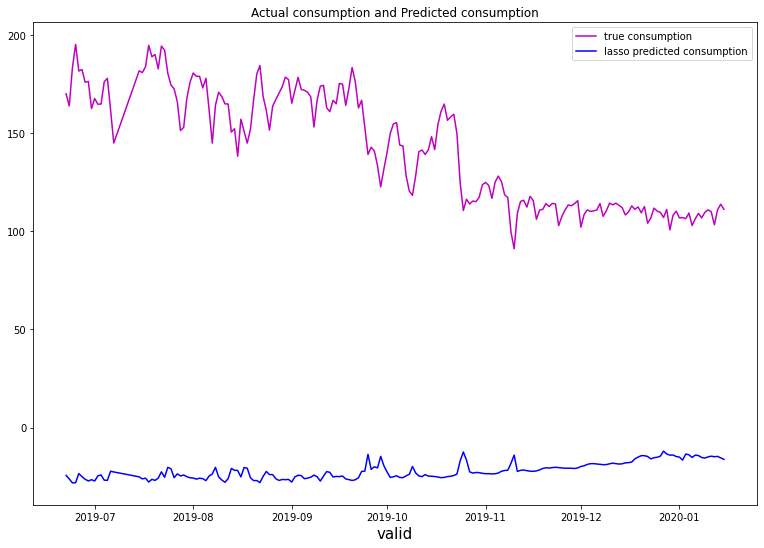

In [86]:
plt.title('Actual consumption and Predicted consumption')
plt.xlabel('valid',fontsize = 15)
plt.plot(valid_data.index,valid_data['Consumption'],color = 'm',label ="true consumption" )
plt.subplots_adjust(right  = 1.8,top = 1.8)
plt.plot(valid_data.index,y_pred1,color = 'b',label ="lasso predicted consumption" )
plt.subplots_adjust(right  = 1.8,top = 1.8)
plt.legend()
plt.show()

test data

In [87]:
self = test_data
degree = 1
def matrix_all(self,degree):
    self_1 = self.drop(['Consumption'],axis = 1)
    s = self_1.T.to_numpy()
    r = s
    for i in range(1,degree):
        x = s
        r = np.vstack((r,x**(i+1)))
    return r

def matrix_construction(self):
    return np.vstack((np.ones(len(self)),(matrix_all(self,degree))))

In [88]:
x = matrix_construction(test_data)

In [89]:
iters = 10000
lr = 0.0005
alpha = 0.01
w = np.zeros((4,1))
print(w)

[[0.]
 [0.]
 [0.]
 [0.]]


In [90]:
y = np.array(test_data['Consumption'])

In [91]:
for i in range(iters):
    y_pred = np.dot(w.T,x)
    e  = y - y_pred
    for j in range(x.shape[0]):
        if w[j] > 0 :
            w[j] -= lr*(alpha + np.dot(x[j,:].reshape(len(y.T),1).T,e.T)).reshape(1,)/x.shape[1]
        else :
            w[j] -= lr*(alpha  - np.dot(x[j,:].reshape(len(y.T),1).T,e.T)).reshape(1,)/x.shape[1]

In [92]:
y_pred = np.dot(w.T,x).T
print(y_pred.shape)
rmse = np.power((np.sum((y - y_pred)**2)/302),0.5)
print(rmse)
rsq = 1- np.sum((y - y_pred)**2)/np.sum((y - np.mean(y))**2)
print(rsq)

(302, 1)
1434.5637201680574
-3359.065405299783


In [93]:
print(w,x.shape)

[[-0.0391744 ]
 [ 1.23870333]
 [ 0.88474276]
 [-0.19019167]] (4, 302)


In [94]:
len(valid_data)

201

In [95]:
y = np.array(test_data['Consumption']).reshape(302,1)

In [96]:
y_pred = np.dot(w.T,x).T
print(y_pred.shape)
rmse = np.power((np.sum((y - y_pred)**2)/302),0.5)
print(rmse)
rsq = 1- np.sum((y - y_pred)**2)/np.sum((y - np.mean(y))**2)
print(rsq)  

(302, 1)
80.86607976323903
-9.676793031655134


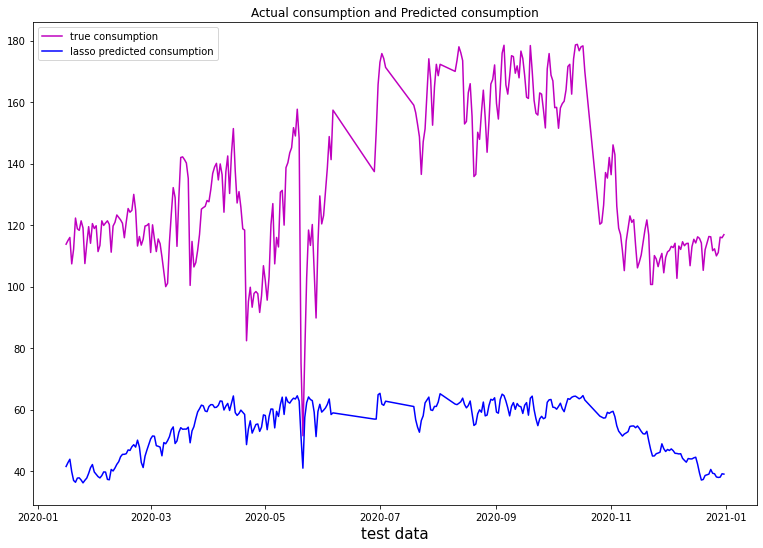

In [97]:
plt.title('Actual consumption and Predicted consumption')
plt.xlabel('test data',fontsize = 15)
plt.plot(test_data.index,test_data['Consumption'],color = 'm',label ="true consumption" )
plt.subplots_adjust(right  = 1.8,top = 1.8)
plt.plot(test_data.index,y_pred,color = 'b',label ="lasso predicted consumption" )
plt.subplots_adjust(right  = 1.8,top = 1.8)
plt.legend()
plt.show()

Ridge regression method for one degree polynomial

In [98]:
best_lamda_best_R_sq

[(1, 7.777777777777778, 0.7441418598880523),
 (2, 0.0, 0.8584014126024448),
 (3, 0.0, 0.8567450366901779),
 (4, 0.0, 0.8496339838538429)]

In [99]:
s = list(zip(*best_lamda_best_R_sq))

In [100]:
deg_pol = list(s[0])
best_lamda = list(s[1])
R_sqr = list(s[2])

In [101]:
df5 = pd.DataFrame(zip(deg_pol,best_lamda,R_sqr),columns = ['deg_pol','best_lamda','R^2'])
df5

deg_pol  best_lamda       R^2
0        1    7.777778  0.744142
1        2    0.000000  0.858401
2        3    0.000000  0.856745
3        4    0.000000  0.849634

In [102]:
df5.iloc[0]['deg_pol']

1.0

In [103]:
lamda_value = df5.iloc[0]['best_lamda']

lamda_value 

7.777777777777778

In [104]:
deg_pol = df5.iloc[0]['deg_pol']
deg_pol

1.0

In [105]:
degree = deg_pol
lamda = lamda_value 

def matrix_all(self,degree):
    self_1 = self.drop(['Consumption'],axis = 1)
    s = self_1.T.to_numpy()
    r = s
    for i in range(1,degree):
        x = s
        r = np.vstack((r,x**(i+1)))
    return r

def matrix_construction(self):
    return np.vstack((matrix_all(self,degree), np.ones(len(self))))


def rdg_est_coff(train_data):
    y = train_data['Consumption']
    A = np.matmul(matrix_construction(train_data),matrix_construction(train_data).T)
    I = np.eye( A.shape[0])
    I_ = I*lamda
    w = np.matmul(np.linalg.inv(np.add(A,I_)),(np.matmul(matrix_construction(train_data),y)))
    return w

def pred_consumption_2_ex(self):
    w = rdg_est_coff(train_data)
    consumption_forcast = np.matmul(matrix_construction(self).T,w)
    return consumption_forcast

def plot_2(self):
    plt.plot(self.index,np.array(self['Consumption']), color = "m",label = "true consumption")
    plt.subplots_adjust(top = 1.8,right = 1.8)
    plt.plot(self.index,pred_consumption_2_ex(self), color = "b",label = "predictrd consumption ")
    plt.subplots_adjust(top = 1.8,right = 1.8)
    plt.legend()
    plt.show()

lasso method

In [106]:
y_pred2 = np.dot(w.T,x2).T
print(y_pred2.shape)
rmse = np.power((np.sum((y2 - y_pred2)**2)/502),0.5)
print(rmse)
rsq = 1- np.sum((y2 - y_pred2)**2)/np.sum((y2 - np.mean(y2))**2)
print(rsq) 

(502, 1)
90.71520629826651
-11.83034319595006


Linear regression method for one degree polynomial


In [107]:
degree = 1

def matrix_all(self,degree):
    self_1 = self.drop(['Consumption'],axis = 1)
    s = self_1.T.to_numpy()
    r = s
    for i in range(1,degree):
        x = s
        r = np.vstack((r,x**(i+1)))
    return r

def matrix_construction(self):
    return np.vstack((matrix_all(self,degree), np.ones(len(self))))

def lss_est_coff(train_data):
    y = train_data['Consumption']
    w = np.matmul(np.linalg.inv(np.matmul(matrix_construction(train_data),matrix_construction(train_data).T)),(np.matmul(matrix_construction(train_data),y)))
    return w


def pred_consumption_1(self):
    w = lss_est_coff(train_data)
    consumption_forcast = np.matmul(matrix_construction(self).T,w)
    return consumption_forcast

def plot_1(self):
    plt.plot(self.index,np.array(self['Consumption']), color = "m",label = "true consumption")
    plt.subplots_adjust(top = 1.8,right = 1.8)
    plt.plot(self.index,pred_consumption_1(self), color = "b",label = "predictrd consumption ")
    plt.subplots_adjust(top = 1.8,right = 1.8)
    plt.legend()
    plt.show()

ploting for training data on first degree polynomial


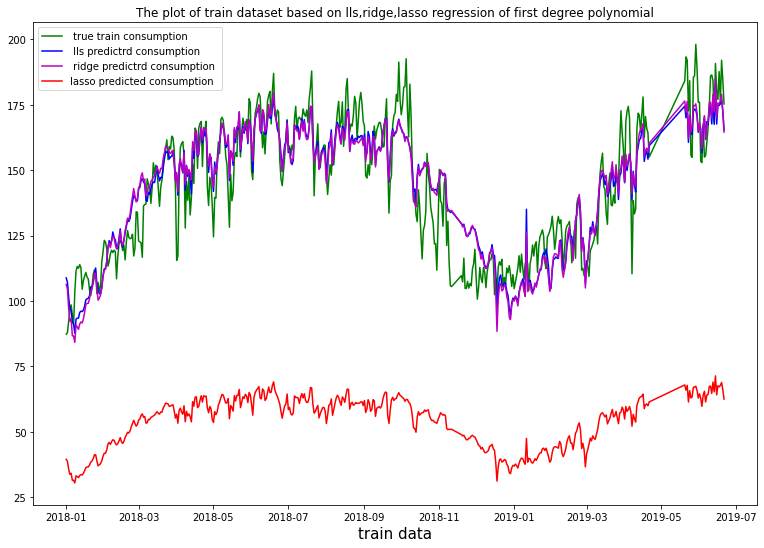

In [108]:
self = train_data

plt.title('The plot of train dataset based on lls,ridge,lasso regression of first degree polynomial')
plt.xlabel('train data',fontsize = 15)

plt.plot(self.index,np.array(self['Consumption']),color = 'green',label = " true train consumption ")
plt.subplots_adjust(right  = 1.1,top = 1)

# this gives the  plot of train data set using lls
plt.plot(self.index,pred_consumption_1(self), color = "b",label = " lls predictrd consumption ")
plt.subplots_adjust(top = 1.8,right = 1.8)

#this gives the plot of train dataset  using ridge regression
plt.plot(self.index,pred_consumption_2_ex(self), color = "m",label = " ridge predictrd consumption ")
plt.subplots_adjust(top = 1.8,right = 1.8)

##this gives the lasso regression on train data
plt.plot(self.index,y_pred2,color = 'r',label ="lasso predicted consumption" )
plt.subplots_adjust(right  = 1.8,top = 1.8)
plt.legend()
plt.show()

ploting for validation data on first degree polynomial


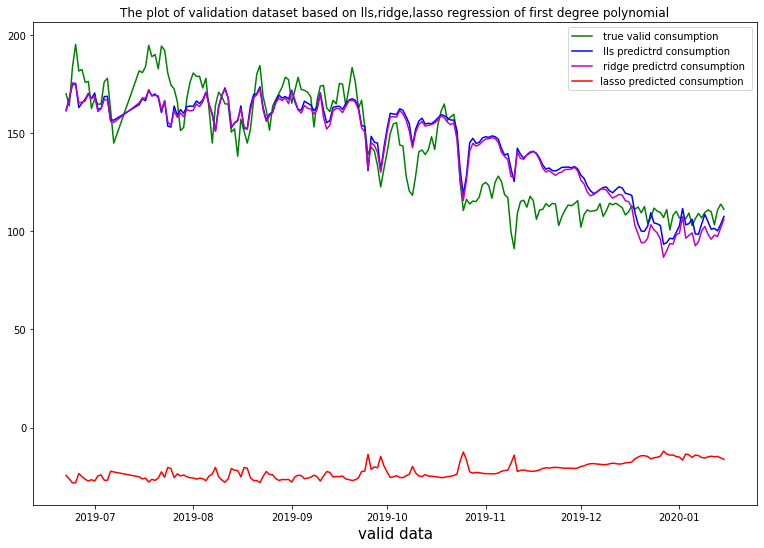

In [109]:
self = valid_data

plt.title('The plot of validation dataset based on lls,ridge,lasso regression of first degree polynomial')
plt.xlabel('valid data',fontsize = 15)

plt.plot(self.index,np.array(self['Consumption']),color = 'green',label = " true valid consumption ")
plt.subplots_adjust(right  = 1.1,top = 1)

# this gives the  plot of train data set using lls
plt.plot(self.index,pred_consumption_1(self), color = "b",label = " lls predictrd consumption ")
plt.subplots_adjust(top = 1.8,right = 1.8)

#this gives the plot of train dataset  using ridge regression
plt.plot(self.index,pred_consumption_2_ex(self), color = "m",label = " ridge predictrd consumption ")
plt.subplots_adjust(top = 1.8,right = 1.8)

##this gives the lasso regression on train data
plt.plot(self.index,y_pred1,color = 'r',label ="lasso predicted consumption" )
plt.subplots_adjust(right  = 1.8,top = 1.8)
plt.legend()
plt.show()

ploting for test data on first degree polynomial


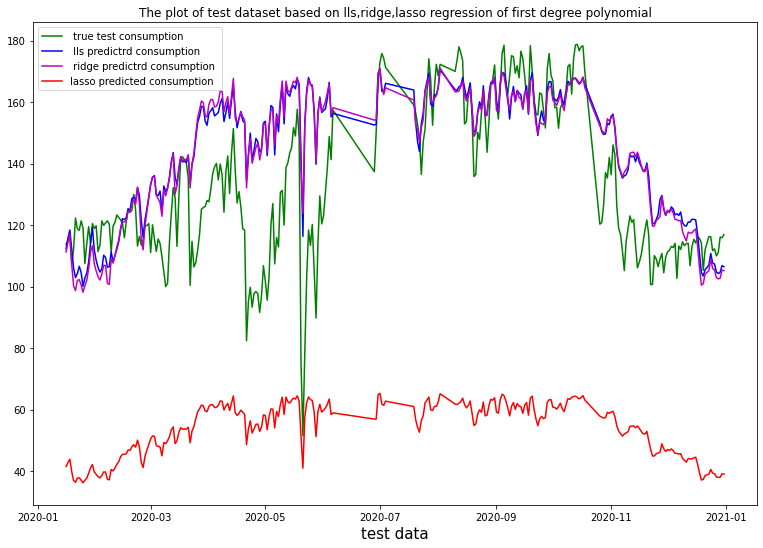

In [110]:
self = test_data

plt.title('The plot of test dataset based on lls,ridge,lasso regression of first degree polynomial')
plt.xlabel('test data',fontsize = 15)

plt.plot(self.index,np.array(self['Consumption']),color = 'green',label = " true test consumption ")
plt.subplots_adjust(right  = 1.1,top = 1)

# this gives the  plot of train data set using lls
plt.plot(self.index,pred_consumption_1(self), color = "b",label = " lls predictrd consumption ")
plt.subplots_adjust(top = 1.8,right = 1.8)

#this gives the plot of train dataset  using ridge regression
plt.plot(self.index,pred_consumption_2_ex(self), color = "m",label = " ridge predictrd consumption ")
plt.subplots_adjust(top = 1.8,right = 1.8)

##this gives the lasso regression on train data
plt.plot(self.index,y_pred,color = 'r',label ="lasso predicted consumption" )
plt.subplots_adjust(right  = 1.8,top = 1.8)
plt.legend()
plt.show()